### Задание 1. Загрузка данных

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Присваиваем названия столбцам и считываем файл в DataFrame
col_names = ['surgery?', 'age', 'rectal temperature', 'pulse', 'respiratory rate',
             'temperature of extremities', 'pain', 'outcome']
df = pd.read_csv('/content/drive/MyDrive/homework/horse_data.csv', names=col_names, usecols=[0, 1, 3, 4, 5, 6, 10, 22])
df

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [ ]:
# Cразу замечаем, что в некоторых столбцах, в ячейках вместо значений стоит "?"
# Скорее всего, таким образом обозначены пропуски данных.
# Cразу заменим "? на "NaN"
df = df.replace('?', np.nan)
df

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1



### Задание 2 и 3. Первичное изучение данных и Работа с пропусками.
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   surgery?                    299 non-null    object
 1   age                         300 non-null    int64 
 2   rectal temperature          240 non-null    object
 3   pulse                       276 non-null    object
 4   respiratory rate            242 non-null    object
 5   temperature of extremities  244 non-null    object
 6   pain                        245 non-null    object
 7   outcome                     299 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [ ]:
df.isna().mean()

surgery?                      0.003333
age                           0.000000
rectal temperature            0.200000
pulse                         0.080000
respiratory rate              0.193333
temperature of extremities    0.186667
pain                          0.183333
outcome                       0.003333
dtype: float64

In [ ]:
# Приведем данные в столбце "rectal temperature" к типу float
df['rectal temperature'] = df['rectal temperature'].astype(float) 
#df['respiratory rate'] = pd.to_numeric(df['respiratory rate'])

In [ ]:
# Пропуски данных по столбцам.
df.isnull().sum() 

surgery?                       1
age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

#### Столбец 1

In [ ]:
# Количество уникальных значений в первом столбце
df['surgery?'].value_counts()

1    180
2    119
Name: surgery?, dtype: int64

In [ ]:
df[df['surgery?'].isnull()]

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48,20,3,4,NaN


In [ ]:
# На основе моды в столбце "surgery?", которая равна "1 = Yes, it had surgery" и значению "4 = intermittent severe pain" в столбце "pain", можно заменить "NaN" в первом столбце на значение "1"
df['surgery?'] = df['surgery?'].fillna('1')

#### Столбец 2

In [ ]:
# Согласно Информации об атрибутах в столбце "age" должны содержаться значения 1 и 2
# 1 = Adult horse, 2 = Young (< 6 months)
# Количество уникальных значений во втором столбце (age)
df['age'].value_counts()

1    276
9     24
Name: age, dtype: int64

In [ ]:
# Можно предположить, что вместо значений "9", должны быть значения "2"
df.loc[(df['age'] == 9), 'age'] = 2

#### Столбец 3

In [ ]:
# Значения в этом столбце - показатель температуры в градусах по Цельсию, где "NaN" - это, скорее всего, отсутствующая информация.
# Посмотрим уникальные значения в третьем столбце (rectal temperature)
df['rectal temperature'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3,  nan, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9,
       37.4, 40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5,
       36. , 37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [ ]:
df['rectal temperature'].median()

38.2

In [ ]:
# Заменим "NaN" на медиану
df['rectal temperature'] = df['rectal temperature'].fillna(df['rectal temperature'].median())

#### Столбец 4

In [ ]:
# Значения в этом столбце - частота сердечных сокращений в ударах в минуту, где "NaN" - это, скорее всего, отсутствующая информация.
# Медиана для наиболее часто встречающихся уникальных значений в четвертом столбце (pulse) где Age = 1 - Adult horse
#                                                                                              Age = 2 - Young
pulse_adult = df[df['age'] == 1].value_counts(df['pulse']).to_frame('count').reset_index().head(8).median()[0]
pulse_adult

50.0

In [ ]:
pulse_young = df[df['age'] == 2].value_counts(df['pulse']).to_frame('count').reset_index().head(5).median()[0]
pulse_young

120.0

In [ ]:
# Показатель пульса зависит от возраста. Если Лошадь младше 6 месяцев, то пульс > 90
#                                        Если старше то пульс < 90
# Заменим "NaN" на медиану и приведем столбец к числовому виду
df.loc[df['pulse'].isnull() & (df['age'] == 2), 'pulse'] = df.loc[df['pulse'].isnull() & (df['age'] == 2), 'pulse'].fillna(pulse_young)
df.loc[df['pulse'].isnull() & (df['age'] == 1), 'pulse'] = df.loc[df['pulse'].isnull() & (df['age'] == 1), 'pulse'].fillna(pulse_adult)
df['pulse'] = df['pulse'].astype(int)

#### Столбец 5

In [ ]:
# Значения в этом столбце - частота дыхания. Нормальная скорость от 8 до 10
# Полезность столбца для анализа данных сомнительна из-за большого размаха.
df['respiratory rate'].unique()

array(['28', '20', '24', '84', '35', nan, '16', '36', '12', '52', '48',
       '21', '60', '34', '42', '30', '96', '72', '15', '44', '32', '22',
       '18', '80', '40', '10', '51', '68', '66', '9', '14', '90', '8',
       '23', '58', '13', '70', '26', '88', '25', '50'], dtype=object)

In [ ]:
# Заменим пропуски на медиану
df['respiratory rate'] = df['respiratory rate'].fillna(df['respiratory rate'].median())
# Приведем к числовому типу
df['respiratory rate'] = df['respiratory rate'].astype(int)

#### Столбец 6

In [ ]:
# Значения в этом столбце - температура конечностей. 1 = Normal, 2 = Warm, 3 = Cool, 4 = Cold, 
# - холодные или холодные конечности указывают на возможный шок
# - горячие конечности должны коррелировать с повышенной ректальной температурой.
# Если верить гуглу, то незначительное повышение до 39,4-39,5 градуса допускается.
df[df['temperature of extremities'].isnull() & (df['rectal temperature'] > 39.5)]

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome


In [ ]:
# Соответственно, вместо отсутствующих значений можно подставить моду.
df['temperature of extremities'].mode()[0]

'3'

In [ ]:
df['temperature of extremities'] = df['temperature of extremities'].fillna(df['temperature of extremities'].mode()[0])

#### Столбец 7

In [ ]:
# Значения в этом столбце - субъективная оценка уровня боли лошади. 1 = alert, no pain
#                                                                   2 = depressed
#                                                                   3 = intermittent mild pain
#                                                                   4 = intermittent severe pain
#                                                                   5 = continuous severe pain
# Чем больнее, тем больше вероятность, что потребуется операция
df['pain'].unique()

array(['5', '3', '2', nan, '4', '1'], dtype=object)

In [ ]:
# Не совсем ясно, как можно по другим значениям определить, была ли у лошади боль, поэтому, в этом случае, можно подставить моду.
df['pain'].mode() 

0    3
dtype: object

In [ ]:
df['pain'] = df['pain'].fillna(df['pain'].mode()[0])

#### Столбец 8

In [ ]:
# Значения в этом столбце - исход, что в итоге случилось с лошадью? 1 = lived
#                                                                   2 = died
#                                                                   3 = was euthanized

In [ ]:
df['outcome'].mode() 

0    1
dtype: object

In [ ]:
df[df['outcome'].isnull()]

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,1,1,38.0,48,20,3,4,NaN


In [ ]:
# Лошадь была прооперирована; ректальная температура, пульс, частота дыхания и температура конечностей в норме.
# Можно предположить, что с ней всё было хорошо.
df['outcome'] = df['outcome'].fillna(df['outcome'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    300 non-null    object 
 1   age                         300 non-null    int64  
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    int64  
 4   respiratory rate            300 non-null    int64  
 5   temperature of extremities  300 non-null    object 
 6   pain                        300 non-null    object 
 7   outcome                     300 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,age,rectal temperature,pulse,respiratory rate
count,300.000000,300.000000,300.000000,300.000000
mean,1.080000,38.174333,70.626667,29.176667
std,0.271746,0.654831,28.338151,16.041088
min,1.000000,35.400000,30.000000,8.000000
25%,1.000000,37.900000,48.000000,20.000000
50%,1.000000,38.200000,60.000000,24.000000
75%,1.000000,38.500000,88.000000,34.250000
max,2.000000,40.800000,184.000000,96.000000


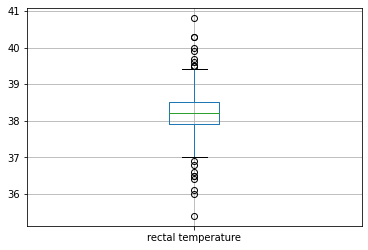

In [ ]:
df.boxplot(column='rectal temperature')

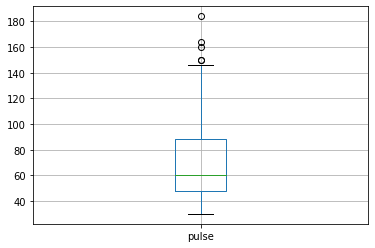

In [ ]:
df.boxplot(column='pulse')

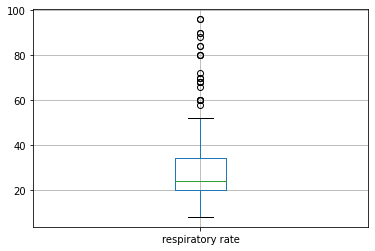

In [ ]:
df.boxplot(column='respiratory rate')